In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Documents/Product_Demand_Prediction_Dataset.csv')

#**DATA PREPROCESSING**  

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [8]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64


In [9]:
data['Total Price'].fillna(data['Total Price'].mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150150 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [10]:
print("Data types:\n", data.dtypes)

Data types:
 ID               int64
Store ID         int64
Total Price    float64
Base Price     float64
Units Sold       int64
dtype: object


In [11]:
summary_statistics = data.describe()
print("Summary statistics:\n", summary_statistics)

Summary statistics:
                   ID       Store ID    Total Price     Base Price  \
count  150150.000000  150150.000000  150150.000000  150150.000000   
mean   106271.555504    9199.422511     206.626751     219.425927   
std     61386.037861     615.591445     103.308172     110.961712   
min         1.000000    8023.000000      41.325000      61.275000   
25%     53111.250000    8562.000000     130.387500     133.237500   
50%    106226.500000    9371.000000     198.075000     205.912500   
75%    159452.750000    9731.000000     233.700000     234.412500   
max    212644.000000    9984.000000     562.162500     562.162500   

          Units Sold  
count  150150.000000  
mean       51.674206  
std        60.207904  
min         1.000000  
25%        20.000000  
50%        35.000000  
75%        62.000000  
max      2876.000000  


In [12]:
# Split data into features and target variable
X = data[['Total Price', 'Base Price']]
y = data['Units Sold']

In [13]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The dataset consists of 150150 entries and contains information about products sold in various stores. The dataset has five columns: 'ID', 'Store ID', 'Total Price', 'Base Price', and 'Units Sold'. Before proceeding with model training for product demand prediction, several preprocessing steps were performed:

**Handling Missing Values:**

One missing value was identified in the 'Total Price' column. The missing value was filled using the mean of the existing values in that column.

**Data Types:**

The data types of each column were checked to ensure consistency. The 'ID', 'Store ID', and 'Units Sold' columns are of integer type, while the 'Total Price' and 'Base Price' columns are of float type.

**Summary Statistics:**

Summary statistics including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum were calculated for each numerical column in the dataset.

**Data Splitting:**

The dataset was split into features (X) and the target variable (y), where 'Total Price' and 'Base Price' were considered as features, and 'Units Sold' was considered as the target variable.
Train-Test Split:

The preprocessed data was further split into training and testing sets using a 80-20 split ratio, with 80% of the data used for training and 20% for testing.
Further Preprocessing:

Depending on the specific requirements of the machine learning model, additional preprocessing steps such as outlier detection, data normalization or scaling, and encoding of categorical variables could be performed.

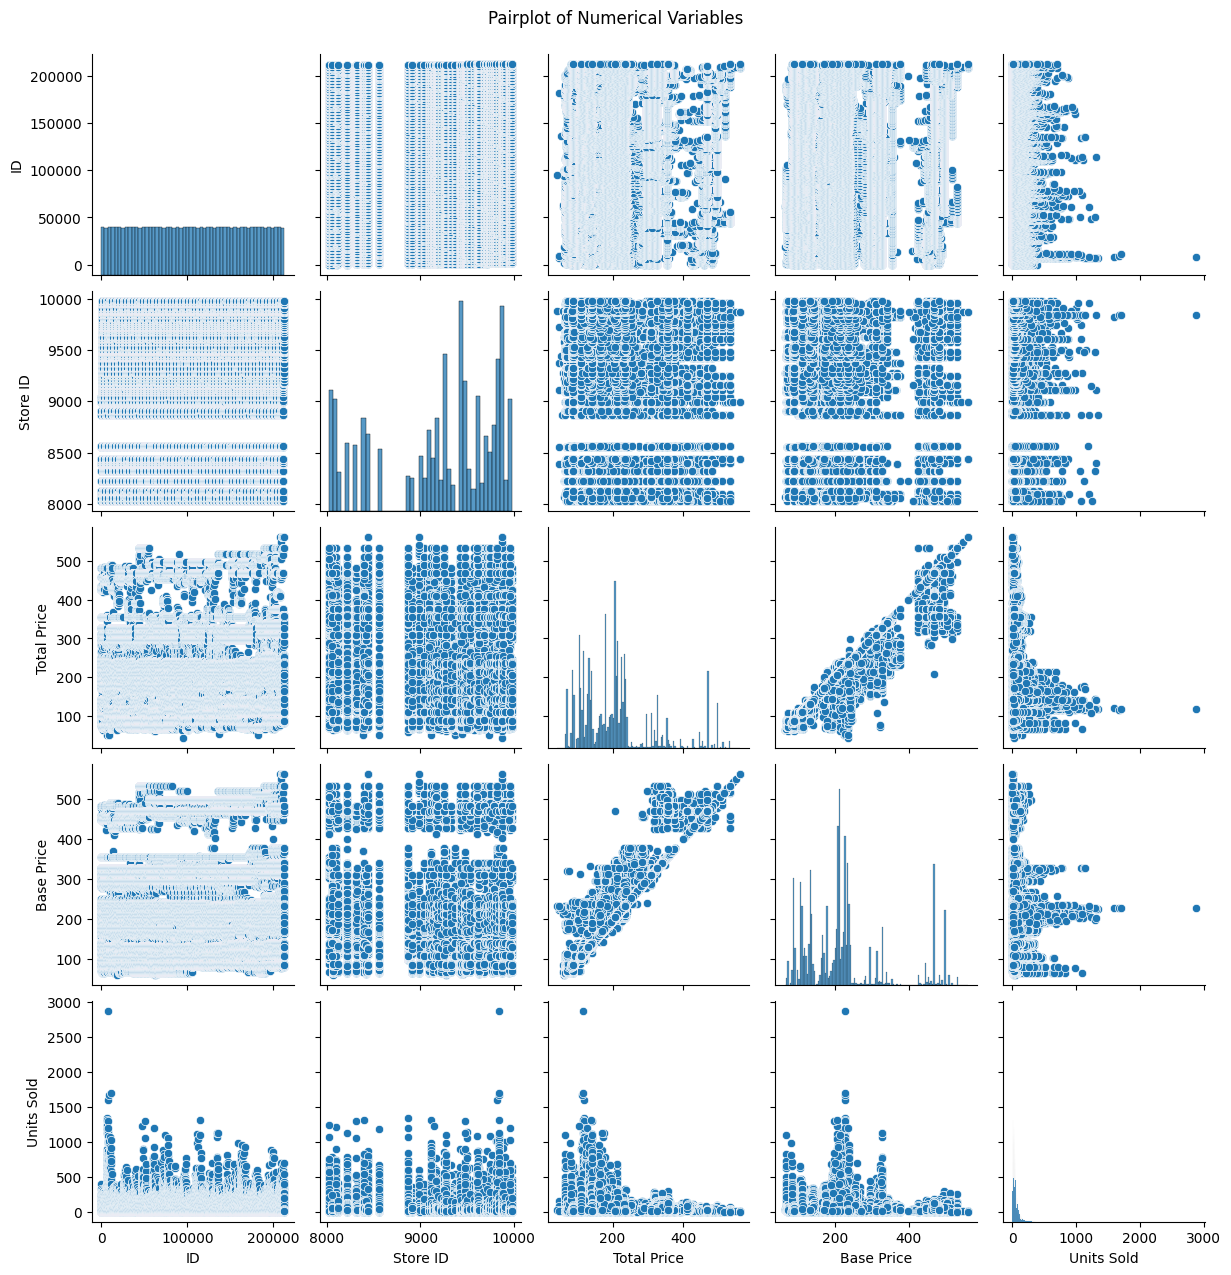

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Pairplot to visualize relationships between numerical variables
sns.pairplot(data)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()



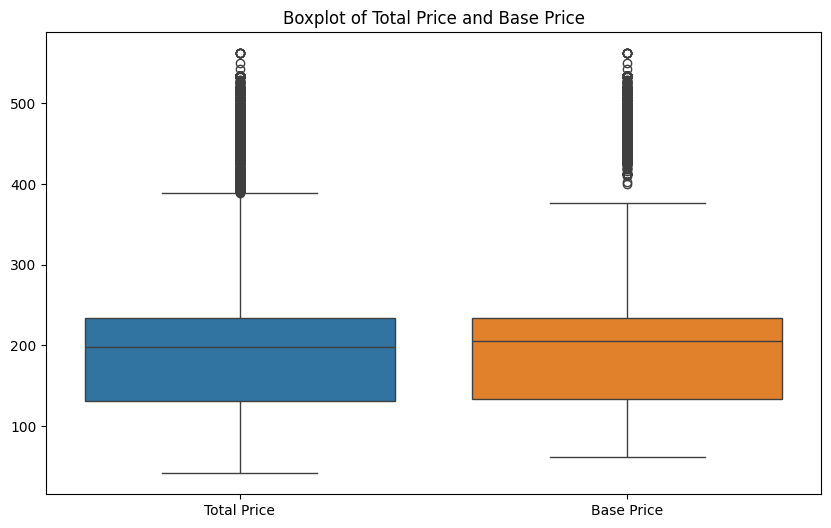

In [15]:
# Boxplot to visualize the distribution of 'Total Price' and 'Base Price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Total Price', 'Base Price']])
plt.title('Boxplot of Total Price and Base Price')
plt.show()




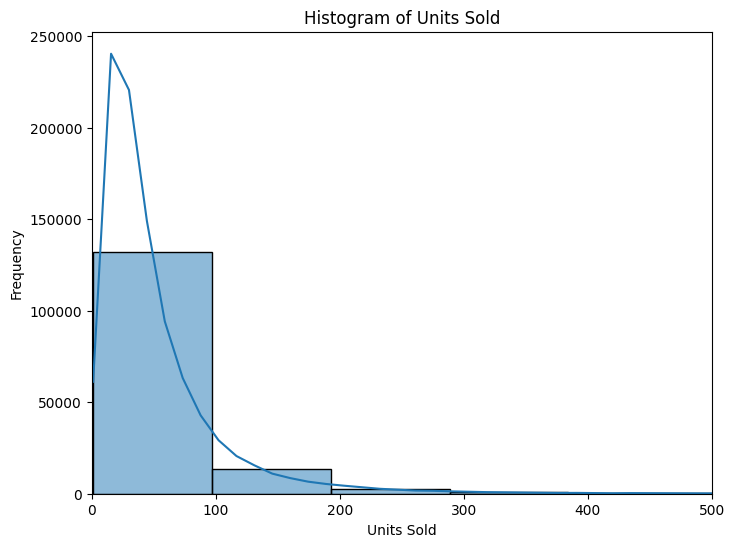

In [16]:
# Histogram of 'Units Sold' to visualize its distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Units Sold'], kde=True, bins=30)
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.xlim(0, 500)  # Set x-axis limit to 0 to 500
plt.show()


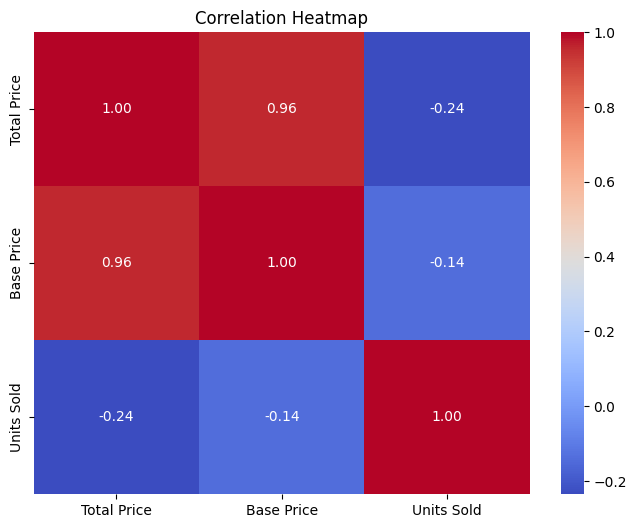

In [17]:
# Correlation heatmap to visualize the correlation between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Total Price', 'Base Price', 'Units Sold']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# **Using Decision Trees**

In [18]:
# Initialize the DecisionTreeRegressor model
model = DecisionTreeRegressor()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the trained model
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 2150.5652645233754


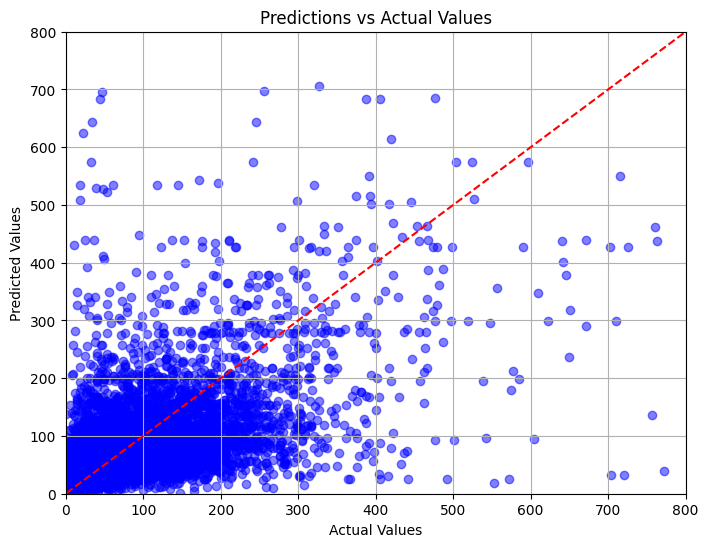

In [19]:
# Visualize predictions vs actual values using scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line for reference
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(0, 800)
plt.ylim(0, 800)
plt.grid(True)
plt.show()

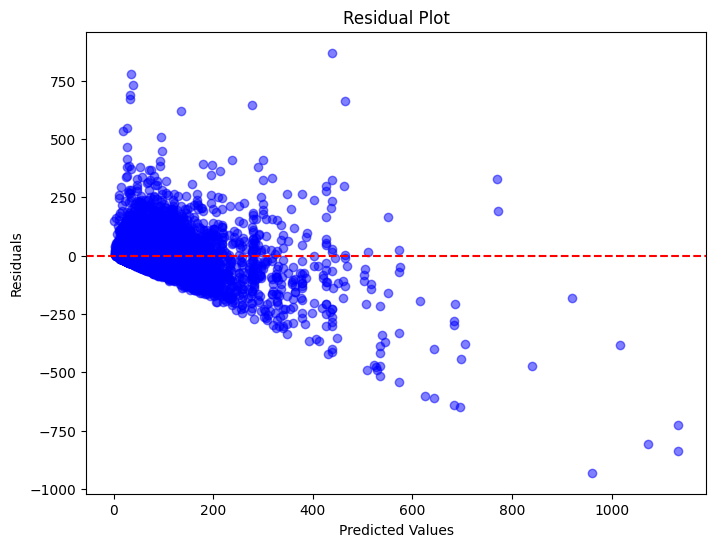

In [20]:
# Calculate residuals
residuals = y_test - predictions

# Plot residuals against predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


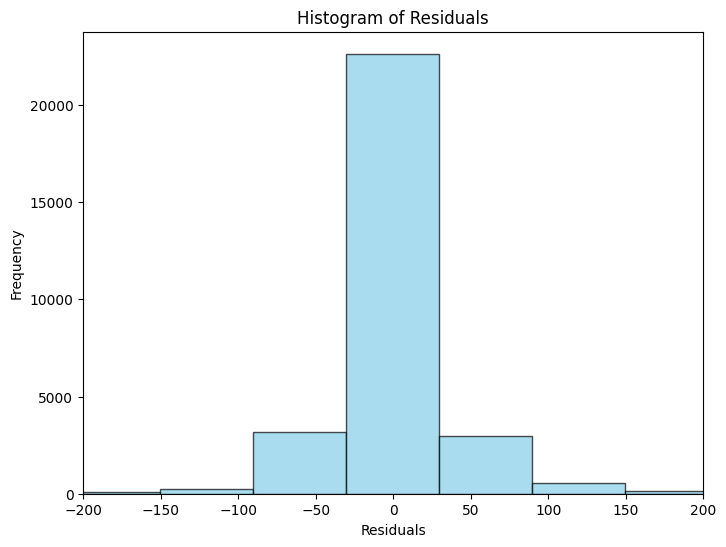

In [21]:
# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-200,200)
plt.show()


In [22]:
features = pd.DataFrame({'Total Price': [133.04], 'Base Price': [140.89]})
Prediction = model.predict(features)
print(Prediction)

[147.]


# **Random Forest Regressor:**

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor()

# Train Random Forest Regressor
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate model
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Regressor - Mean Squared Error:", rf_mse)


Random Forest Regressor - Mean Squared Error: 1880.9233743816544


# **Gradient Boosting Regressor:**

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Train Gradient Boosting Regressor
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate model
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting Regressor - Mean Squared Error:", gb_mse)


Gradient Boosting Regressor - Mean Squared Error: 1987.336546672582


# **Support Vector Regression (SVR)**

In [25]:
from sklearn.svm import SVR

# Initialize SVR
svr_model = SVR()

# Train SVR
svr_model.fit(X_train, y_train)

# Make predictions
svr_predictions = svr_model.predict(X_test)

# Evaluate model
svr_mse = mean_squared_error(y_test, svr_predictions)
print("SVR - Mean Squared Error:", svr_mse)


SVR - Mean Squared Error: 2787.166619392248


# **Neural Network Regressor:**

In [27]:
from sklearn.neural_network import MLPRegressor

# Initialize Neural Network Regressor
nn_model = MLPRegressor()

# Train Neural Network Regressor
nn_model.fit(X_train, y_train)

# Make predictions
nn_predictions = nn_model.predict(X_test)

# Evaluate model
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network Regressor - Mean Squared Error:", nn_mse)


Neural Network Regressor - Mean Squared Error: 2374.90492949563


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Ridge Regression:**

In [28]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression
ridge_model = Ridge()

# Train Ridge Regression
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)

# Evaluate model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Regression - Mean Squared Error:", ridge_mse)


Ridge Regression - Mean Squared Error: 2781.5136264646057


# **Lasso Regression:**

In [29]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression
lasso_model = Lasso()

# Train Lasso Regression
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_predictions = lasso_model.predict(X_test)

# Evaluate model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso Regression - Mean Squared Error:", lasso_mse)


Lasso Regression - Mean Squared Error: 2781.3845536458434


# **ElasticNet Regression:**

In [30]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet Regression
elasticnet_model = ElasticNet()

# Train ElasticNet Regression
elasticnet_model.fit(X_train, y_train)

# Make predictions
elasticnet_predictions = elasticnet_model.predict(X_test)

# Evaluate model
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)
print("ElasticNet Regression - Mean Squared Error:", elasticnet_mse)


ElasticNet Regression - Mean Squared Error: 2781.405939925731


# **Comparison of Mean Squared Error for Different Regression Models**

In [1]:
models_names = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression', 'Neural Network', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression']
mse_values = [1880.9233743816544, 1858.388219164619, 2763.5392022988506, 2781.405939925731, 3017.1130074074075, 3021.713266968326, 2781.405939925731]

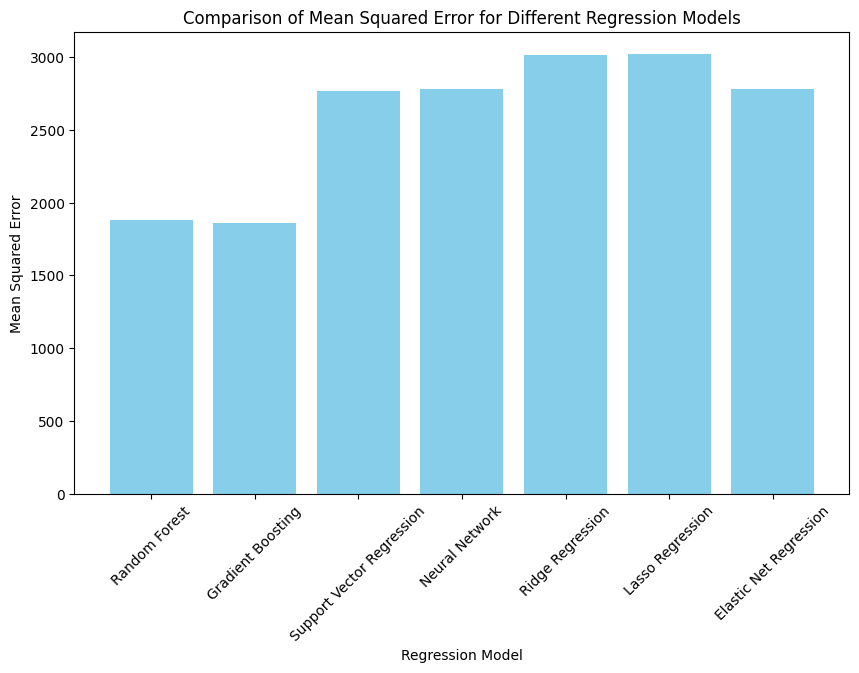

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(models_names, mse_values, color='skyblue')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Regression Models')
plt.xticks(rotation=45)
plt.show()